# Intermediate Python

Chris Myers

Senior Research Associate &mdash; Cornell University Center for Advanced Computing (CAC)

Adjunct Professor &mdash; Cornell Department of Physics / Laboratory of Atomic & Solid State Physics (LASSP)

https://cac.cornell.edu/myers

c.myers@cornell.edu



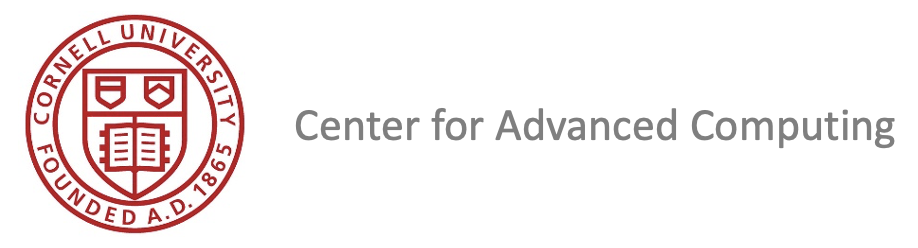

<pre>


    
</pre>

# Outline

Python is both a programming language and a software ecosystem that is widely used to support many tasks.  This lecture will address some more advanced features of both the language and the ecosystem that are useful for tackling more complex and numerically intensive computations that arise in scientific computing. Some of what is discussed will help you directly in writing your own code, and some will probably be more useful in understanding code that others have written.

* Introduction
    * Overview of the Python language
    * Overview of the Python ecosystem
* Aspects of the Python language
    * Python as an object-oriented language
    * Python as an extensible language
* Performance considerations
    * Strategies for higher performance Python
    * Compiled libraries
    * Compilation frameworks
    * Data structures
    * Parallel processing
* Aspects of the Python ecosystem
    * Python Standard Library


## Accessing this material

* This talk is being given in a Jupyter notebook.
* The notebook, associated material, and instructions can be found at:
    * https://github.com/CornellCAC/SCTS_IntermediatePython
* Links to the materials and the recording will be emailed to all registrants after the talk is completed.

## Additional Resources

* Previous CAC/SCTS lectures on various aspects of the Python language and ecosystem
    * https://its.weill.cornell.edu/scientific-computing-training-series
    * Introduction to Python (Fall 2022, Fall 2023, Spring 2024)
    * Scientific Computing with Python (with hands-on) (Fall 2023)
    * JupyterLab (in the Cloud) for Python (Fall 2023)
    * Python for Scientific Computing and Data Science (Spring 2023)
    * Python for Digital Humanities and Social Science (Spring 2023)
    * Python for Data Visualization (Spring 2023)
    * Introduction to Jupyter Lab for Python (Fall 2022)
* Python language website: python.org
    * Tutorial: https://docs.python.org/3/tutorial/index.html
    * Glossary: https://docs.python.org/3/glossary.html
    * Library: https://docs.python.org/3/library/index.html
* Cornell Virtual Workshop (CVW) materials at https://cvw.cac.cornell.edu
    * Introduction to Python Programming
    * Python for Data Science
    * Python for High Performance
    * AI with Deep Learning
    * Interactive Data Visualization with Bokeh

---

# Introduction

## Overview of the Python language

* **general-purpose**: not built for a particular application domain (such as scientific computing or statistics)
* **interpreted**: processed one statement at a time by an interpreter &mdash; not separately compiled into an executable
* **dynamically typed**: variables acquire the type of whatever object is assigned to them &mdash; not statically typed, but "duck typed"
* **object-oriented**: organized around data abstractions with support for creation of new abstractions &mdash; more to follow
* **extensible**: can call code written in other languages through an API &mdash; more to follow

## Overview of the Python ecosystem

* Barebones Python installation
    * default python interpreter (formally, CPython, installed as "python" or "python3")
    * Python/C API (to call C from Python)
    * Python Standard Library
* Many third-party packages, libraries and tools to support additional functionality
* Different ways of running and developing Python programs
    * **python** : interpreter run from the command line (good for batch jobs)
    * **ipython** : enhanced interpreter run on the command line, and an interactive kernel used by other applications
    * **jupyter** : environment combining Markdown text, Python code, and results of running code, including plots (uses ipython)
    * **Integrated Development Environments (IDEs)**: combining code editor, interpreter, file browser, inspection tools
        * Visual Studio Code
        * PyCharm
    * **Online environments**: web-based environments for running Python code or Jupyter notebooks without having to install software locally
        * Google Colab / Amazon SageMaker Studio Lab -- can run Jupyter notebooks, typically with lots of other packages installed
        * Many simpler Read, Evaluate, Print, and Loop (REPL) environments -- e.g., TutorialsPoint, Scaler, Replit -- but may not have all the external packages you might want to use
* Different ways of managing Python installations and environments
    * conda package manager and conda environments
    * Python virtual environments (venv) and pip package manager
    * information in the Appendix to create environments for running this notebook 

### This talk is taking place in a live Jupyter notebook

This is an example of a Markdown cell.  We can include useful commentary or documentation about the code we are describing.

In [1]:
# This is a code cell, which serves as an Input.  
# Since the code produces an output (x), there is an Output that is included after we execute the cell.
# The hash / pound symbol # indicates a comment in Python source code.

x = 2 + 2
x

4

In [2]:
# We can do a little bit of Jupyter configuration here to facilitate the workflow in the notebook.
# Commands beginning with percent % are "magic" commands in IPython/Jupyter, and are not part of the Python language.

%pprint
%matplotlib inline

Pretty printing has been turned OFF


### Many Python ecosystems

* Used by different communities -- a few examples
    * a scripting environment used by operating systems and for systems administration tasks
    * a set of tools for web programming and website development
    * a set of packages for generation of graphical user interfaces (GUIs)
    * **an environment for scientific computing, data science, and machine learning**
 
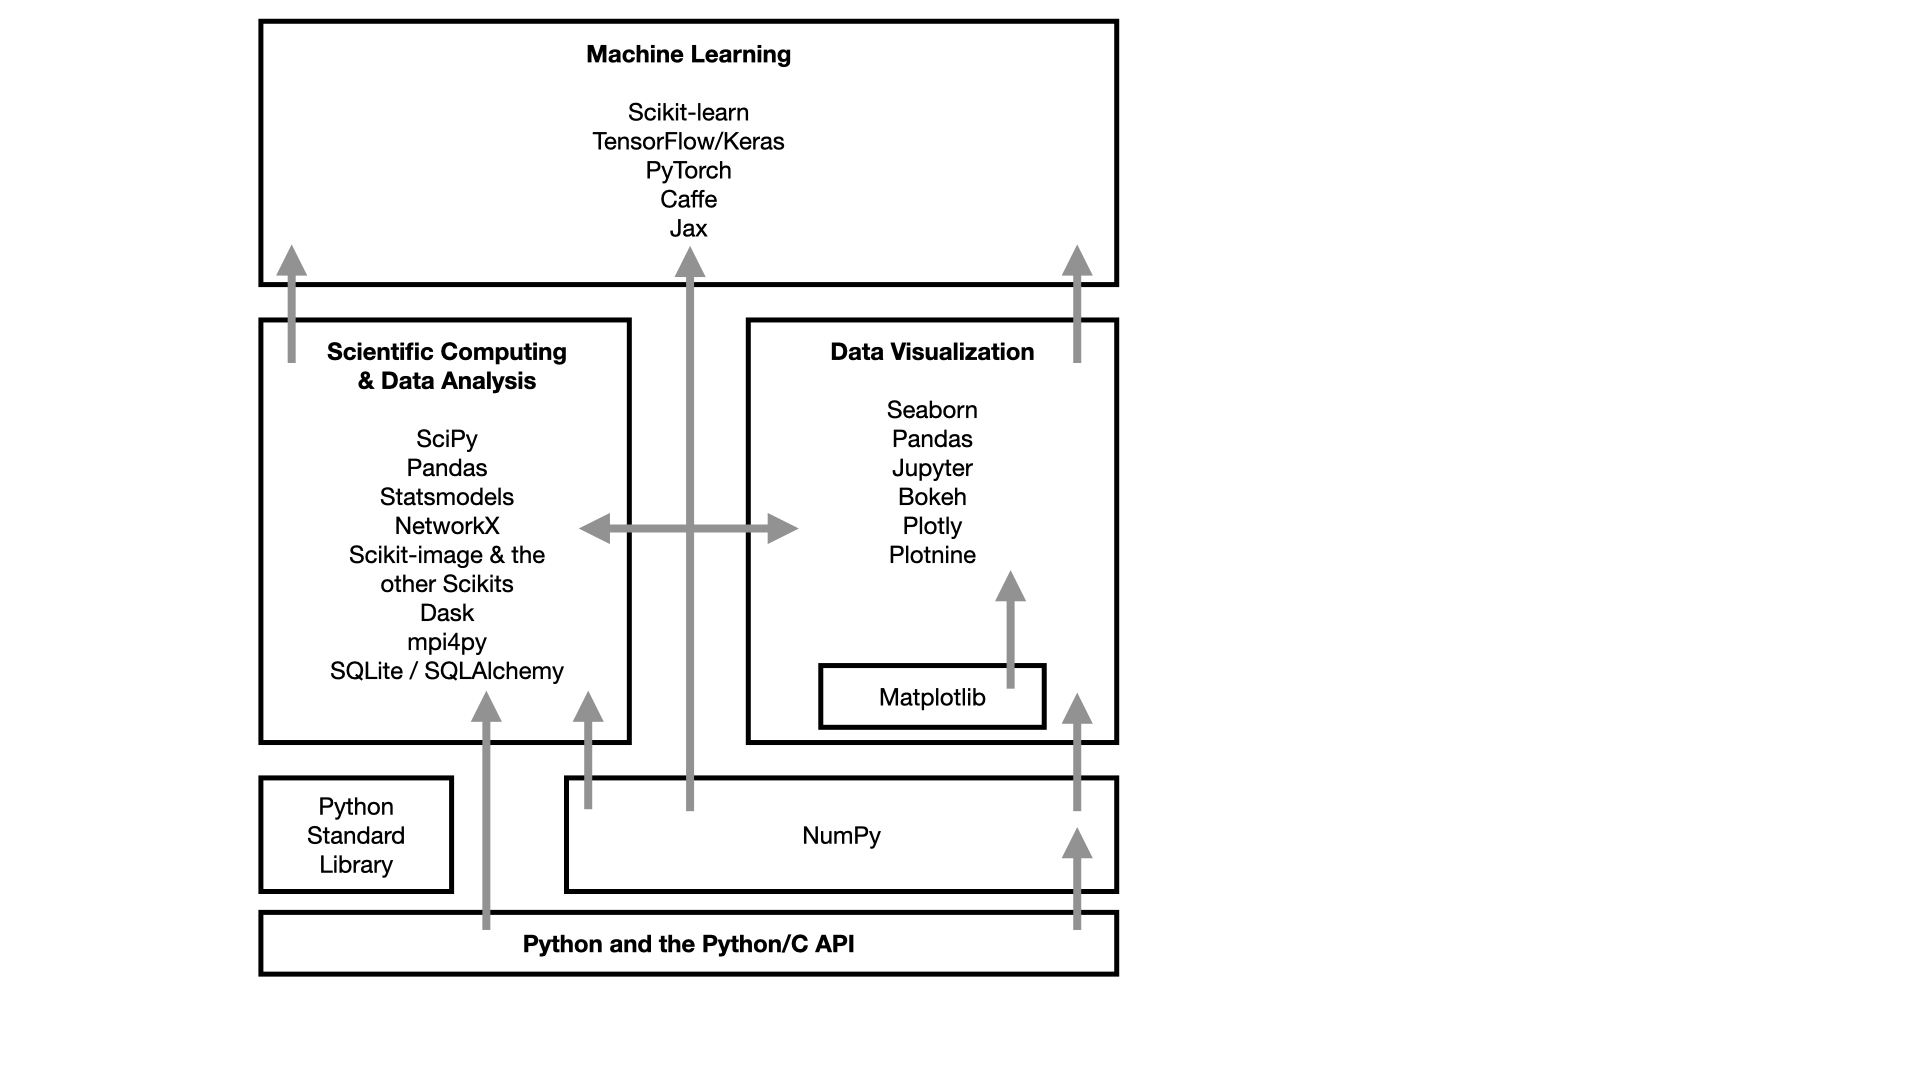

---

# Aspects of the Python language

## Python as an object-oriented language

* Object-oriented means:
    * provides support for bundling together data and functions into complex data "objects"
    * provides support for defining new data types (classes) representing different abstractions useful for different problem domains
    * often involving a set of programming techniques such as:
        * *encapsulation*: to insulate the internal implementation from the external interface
        * *inheritance*: to define hierarchies of abstractions that allow for shared behavior across different object types
        * *polymorphism*: to enable different types of objects to respond to the same request
* Python is practical and not strict &mdash; also supports procedural and functional programming
* "Everything" in Python is an object (aside from keywords and other syntactic elements defined by the language itself)
    * a *type*
    * a *value*
    * some *attributes* (data defined in association with objects)
    * some *methods* (functions defined in association with objects)
    * a *namespace* that organizes attributes and methods

### Everything in Python is an object

In [3]:
x = [1,2,3]
type(x)

<class 'list'>

In [4]:
help(x)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |
 |  Built-in mutable sequence.
 |
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __contains__(self, key, /)
 |      Return bool(key in self).
 |
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __getitem__(self, index, /)
 |      Return self[index].
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __it

**Notes**: 

* The built-in function `dir` prints a list the names of items in an object's namespace.
* The dot operator ```.``` accesses elements in an object's namespace

In [5]:
dir(x)

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

In [6]:
x.append(4)
x

[1, 2, 3, 4]

In [7]:
s = 'Hello, world'
dir(s)

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']

**Notes:**

* objects typically have "special methods", a.k.a. "dunder" (double-underscore) methods, that get called in association with specific operators or built-in functions
* `2+2` -> `(2).__add__(2)`  where the `+` operator results in a call to the method `int.__add__`
* `'abc' + 'def'` produces the concatenated string 'abcdef', where the `+` operator calls the method `str.__add__`
* `x = [1,2,3]; len(x)` calls the method `list.__len__`
* `x[1]` calls the method `list.__getitem__`
* `d = {'a': 1, 'b': 2}; d['b']` calls the method `dict.__getitem__`
* `d['c'] = 3` calls the method `dict.__setitem__`

### Working with objects

Packages and modules often define new classes (i.e., new types of objects), along with functions and methods that can query and manipulate those objects
* numpy: array (ndarray)
* pandas: DataFrame and Series
* biopython: Seq and SeqRecord
* networkx: Graph, DiGraph, MultiGraph, MultiDiGraph
* sklearn: Estimator

It is often useful to read some documentation and/or source code to better understand:
* what new types of objects are defined
* what interfaces (methods) those objects expose
* how those objects interact with each other

### Biopython Seq objects

In [8]:
from Bio.Seq import Seq
my_seq = Seq('AGTACACTGGTGCCATGTACC')
my_seq

Seq('AGTACACTGGTGCCATGTACC')

In [9]:
dir(my_seq)

['__abstractmethods__', '__add__', '__annotations__', '__array_ufunc__', '__bytes__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_data', 'back_transcribe', 'complement', 'complement_rna', 'count', 'count_overlap', 'defined', 'defined_ranges', 'endswith', 'find', 'index', 'islower', 'isupper', 'join', 'lower', 'lstrip', 'removeprefix', 'removesuffix', 'replace', 'reverse_complement', 'reverse_complement_rna', 'rfind', 'rindex', 'rsplit', 'rstrip', 'search', 'split', 'startswith', 'strip', 'transcribe', 'translate', 'upper']

In [10]:
my_seq.count('A')

5

In [11]:
my_seq.translate()

Seq('STLVPCT')

In [12]:
my_seq.translate?

Signature:
my_seq.translate(
    table='Standard',
    stop_symbol='*',
    to_stop=False,
    cds=False,
    gap='-',
)
Docstring:
Turn a nucleotide sequence into a protein sequence by creating a new sequence object.

This method will translate DNA or RNA sequences. It should not
be used on protein sequences as any result will be biologically
meaningless.

Arguments:
 - table - Which codon table to use?  This can be either a name
   (string), an NCBI identifier (integer), or a CodonTable
   object (useful for non-standard genetic codes).  This
   defaults to the "Standard" table.
 - stop_symbol - Single character string, what to use for
   terminators.  This defaults to the asterisk, "*".
 - to_stop - Boolean, defaults to False meaning do a full
   translation continuing on past any stop codons (translated as the
   specified stop_symbol).  If True, translation is terminated at
   the first in frame stop codon (and the stop_symbol is not
   appended to the returned protein sequence).


### NetworkX Graph and DiGraph objects

node degrees: [(1, 2), (2, 3), (3, 2), (4, 1)]


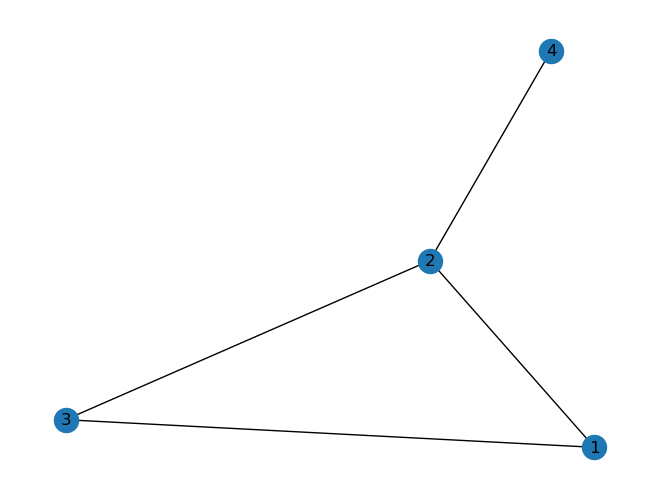

In [13]:
import networkx as nx

g1 = nx.Graph()  # undirected graph
g1.add_edges_from([(1,2), (2,3), (3,1), (4,2)])
print('node degrees:', g1.degree())
nx.draw(g1, with_labels=True)

node in-degrees: [(1, 1), (2, 2), (3, 1), (4, 0)]
node out-degrees: [(1, 1), (2, 1), (3, 1), (4, 1)]


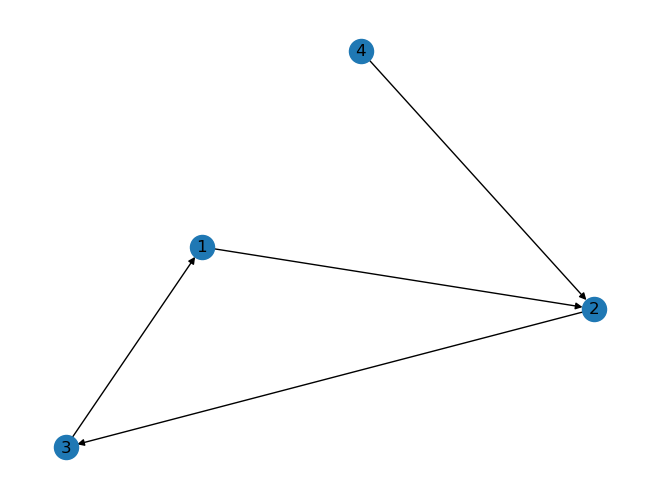

In [14]:
g2 = nx.DiGraph()   # directed graph
g2.add_edges_from([(1,2), (2,3), (3,1), (4,2)])
print('node in-degrees:', g2.in_degree())
print('node out-degrees:', g2.out_degree())
nx.draw(g2, with_labels=True)

### Defining new objects
* The keyword ```class``` is used to define new classes (i.e., new types of objects)
* The keyword ```def``` is used to define new methods on classes
* Instance methods must contain a first argument referring to the instance itself, *conventionally* named ```self```
* A call to a method implicitly inserts the instance into the first argument, but it is not explicitly provided

In [15]:
class MyGraph:
    """
    A simple class for undirected graphs -- not recommended: use networkx instead
    """

    def __init__(self):
        self.nodes = dict()

    def add_node(self, node):
        self.nodes[node] = set()

    def add_edge(self, node1, node2):
        if node1 not in self.nodes:
            self.add_node(node1)
        if node2 not in self.nodes:
            self.add_node(node2)
        self.nodes[node1].add(node2)
        self.nodes[node2].add(node1)

    def add_edges_from(self, edgelist):
        for n1, n2 in edgelist:
            self.add_edge(n1, n2)

    def get_nodes(self):
        return self.nodes.keys()

    def get_edges(self):
        return self.nodes.items()

    def degree(self):
        return [(k, len(v)) for k,v in self.get_edges()]

In [16]:
myg = MyGraph()
myg.add_edge(1,2)     # equivalent to MyGraph.add_edge(myg, 1, 2) -- i.e., myg is self
myg.add_edge(2,3)
myg.add_edge(3,1)
myg.add_edge(4,2)
myg.degree()

[(1, 2), (2, 3), (3, 2), (4, 1)]

## Python as an extensible language

### CPython and the Python/C API 

* CPython: the reference implementation of the language, and the most widely used interpreter (generally installed as "python")
* CPython compiles Python source code to bytecodes, and then operates on those
* CPython is accompanied by an Application Programming Interface (API) that enables communication between Python and C (and thus to basically any other language)
* Python/C API allows for compiled chunks of code to be called from Python within the CPython interpreter &rarr; <b>extension modules</b>
* Much core functionality of the Python language and standard library are written in C

### Extension Modules

* a compiled shared object library (.so, .dll, etc.) making use of Python/C API
    * compiled code executing operations of interest
    * wrapper/interface code consisting of calls to Python/C API and underlying compiled code
* can be imported into python interpreter just as pure Python source code can

In [17]:
import math
print(math.cos(math.pi))
print("---")

print(math.__file__)
print("---")

!nm $math.__file__   # display name list / symbol table in a Unix-like OS

-1.0
---
/Users/crm17/Z/miniconda3/envs/intermediate_py/lib/python3.12/lib-dynload/math.cpython-312-darwin.so
---
                 U _PyBool_FromLong
                 U _PyBool_Type
                 U _PyErr_Clear
                 U _PyErr_ExceptionMatches
                 U _PyErr_Format
                 U _PyErr_NoMemory
                 U _PyErr_Occurred
                 U _PyErr_SetFromErrno
                 U _PyErr_SetString
                 U _PyExc_MemoryError
                 U _PyExc_OverflowError
                 U _PyExc_StopIteration
                 U _PyExc_TypeError
                 U _PyExc_ValueError
                 U _PyFloat_AsDouble
                 U _PyFloat_FromDouble
                 U _PyFloat_Type
0000000000001574 T _PyInit_math
                 U _PyIter_Next
                 U _PyLong_AsDouble
                 U _PyLong_AsLongAndOverflow
                 U _PyLong_AsLongLongAndOverflow
                 U _PyLong_AsUnsignedLongLong
                 U _PyLon

---

# Performance Considerations

* Python is an interpreted language, and as such, Python programs are intrinsically slower than those written in compiled languages.
* Long-running numerical and scientific applications can benefit from various strategies to improve run time performance.



## Strategies for higher performance Python

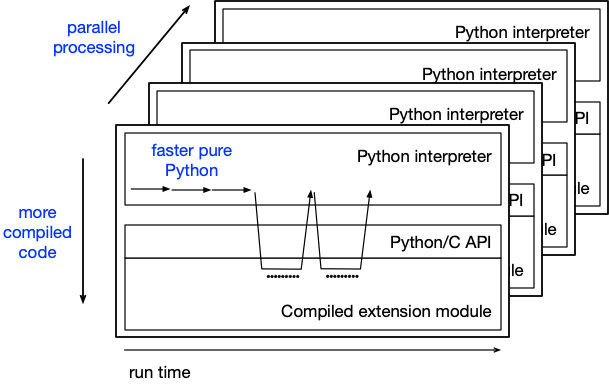

## Strategies for incorporating compiled extension modules

* Use existing compiled libraries
    * numpy, scipy, pandas, scikit-learn, TensorFlow, PyTorch, etc.
* Generate Python/C API interfaces for existing code
    * by hand
    * with automation tools like cffi, SWIG, pybind11, Boost.Python
* Use compilation frameworks that compile functions or code snippets (possibly on the fly)
    * Numba
    * Cython
    * a growing list of other tools including TensorFlow, PyTorch, JAX, Taichi, etc.

### Performance from compiled libraries

e.g., array operations in numpy, a compiled extension module written in C

In [18]:
import numpy as np

X = np.random.random((1000,1000))
Y = np.random.random((1000,1000))
Z = np.random.random((1000,1000))

def f1(x,y,z):
    return x + 2*y + 3*z

def f2(x,y,z):
    result = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            result[i,j] = x[i,j] + 2*y[i,j] + 3*z[i,j]
    return result

In [19]:
%timeit f1(X,Y,Z)
%timeit f2(X,Y,Z)

2.01 ms ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
408 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


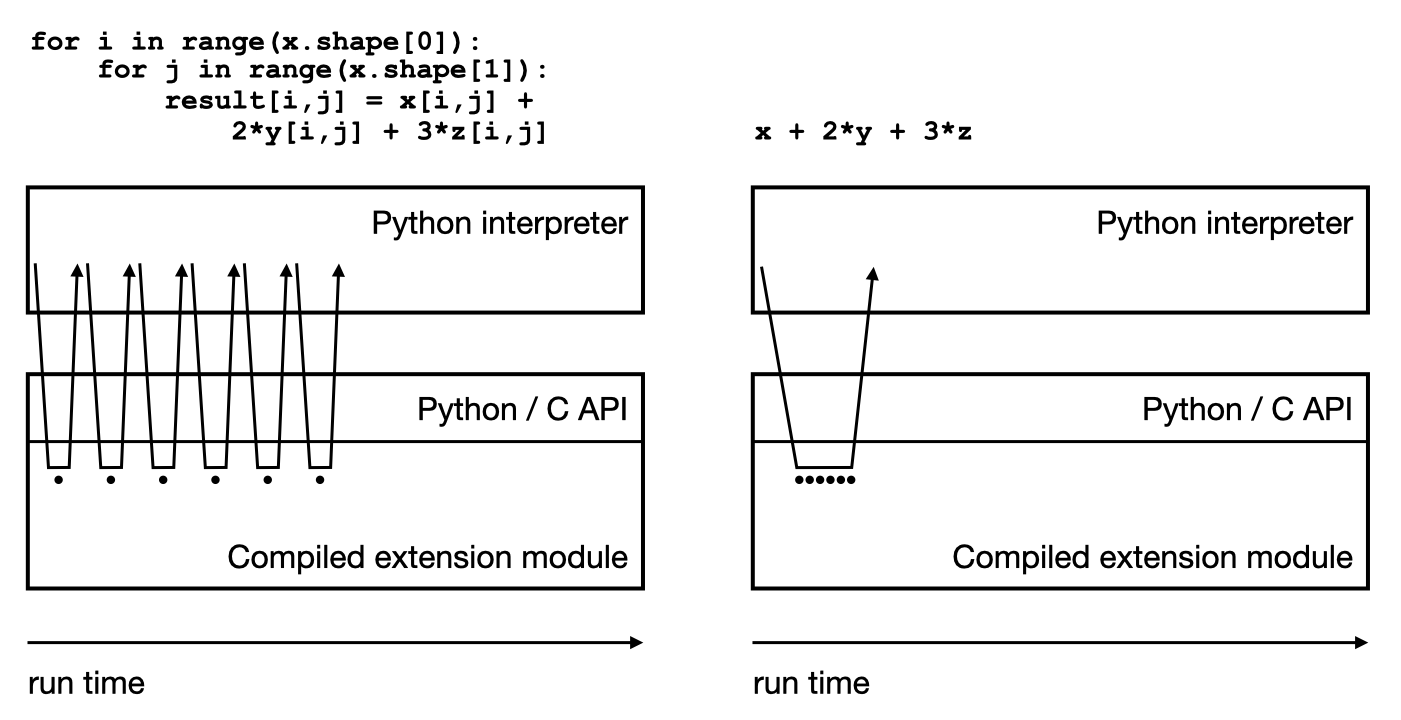

### Compilation frameworks

#### Numba

* a Just-In-Time (JIT) compiler that translates a subset of Python and NumPy code into fast machine code
* works best on code that uses NumPy arrays and functions, and loops
* Numba can outperform NumPy-only code by exposing loop internals for optimization, and avoiding temporary arrays

In [20]:
from numba import njit

@njit
def f3(x,y,z):
    result = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            result[i,j] = x[i,j] + 2*y[i,j] + 3*z[i,j]
    return result

In [21]:
%timeit f1(X,Y,Z)
%timeit f2(X,Y,Z)
%timeit f3(X,Y,Z)

2.02 ms ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
423 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.02 ms ± 50.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
# Speedup?



#### Cython

Cython is both:
* an optimizing static compiler for code written in Python and Cython
* a C-like superset of the Python language that allows for type declarations and other descriptive elements that support compilation

Cython code can be:
* precompiled from a .pyx file to a .c file
* loaded into a Jupyter notebook

Cython code is pervasive throughout the Python Scientific Computing Ecosystem to accelerate computations

In [23]:
# Example: adapted from Cython tutorial at https://cython.readthedocs.io/en/latest/src/tutorial/cython_tutorial.html#primes

def primes(nb_primes):
    if nb_primes > 1000:
        nb_primes = 1000

    p = [0]*nb_primes
    len_p = 0  # The current number of elements in p.
    n = 2
    while len_p < nb_primes:
        # Is n prime?
        for i in p[:len_p]:
            if n % i == 0:
                break

        # If no break occurred in the loop, we have a prime.
        else:
            p[len_p] = n
            len_p += 1
        n += 1

    # Let's return the result in a python list:
    result_as_list  = [prime for prime in p[:len_p]]
    return result_as_list

primes100 = primes(100)
print(primes100)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


In [24]:
%load_ext Cython

In [25]:
%%cython -a

def primes_cython(int nb_primes):
    cdef int n, i, len_p
    cdef int p[1000]
    if nb_primes > 1000:
        nb_primes = 1000

    len_p = 0  # The current number of elements in p.
    n = 2
    while len_p < nb_primes:
        # Is n prime?
        for i in p[:len_p]:
            if n % i == 0:
                break

        # If no break occurred in the loop, we have a prime.
        else:
            p[len_p] = n
            len_p += 1
        n += 1

    # Let's return the result in a python list:
    result_as_list  = [prime for prime in p[:len_p]]
    return result_as_list

cprimes100 = primes_cython(100)
print(cprimes100)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


In [26]:
%timeit primes(100)

%timeit primes_cython(100)

231 µs ± 543 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.04 µs ± 38.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [27]:
# Speedup?



## Writing Faster Python

### Choosing the right data structure for the job, e.g., sets for set operations


In [28]:
set1 = set(range(0,10000))        # create a set with a bunch of numbers in it
set2 = set(range(5000,20000))     # create another set with a bunch of numbers in it
isec = set1 & set2                # same as isec = set1.intersection(set2)

In [29]:
list1 = list(range(0,10000))      # create a list with a bunch of numbers in it
list2 = list(range(5000,20000))   # create another list with a bunch of numbers in it
isec = [e1 for e1 in list1 for e2 in list2 if e1==e2]    # uses list comprehensions

In [30]:
%timeit set1 & set2

110 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
%timeit [e1 for e1 in list1 for e2 in list2 if e1==e2]

1.24 s ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit -n 1000000 9800 in set1

18.7 ns ± 0.183 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [33]:
%timeit 9800 in list1

61.4 µs ± 87.5 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Parallel processing in Python

* Multithreading
    * The CPython interpreter has a Global Interpreter Lock (GIL) associated with a running process.  Only 1 thread can be running at a time, so conventional multithreading provides no speedup.
    * Compiled extension modules that implement multithreading can be called from within the CPython interpreter (e.g., linear algebra / BLAS compiled with OpenMP).
* Multiprocessing
    * Multiple python processes *can* run at the same time.
    * The ```multiprocessing``` module in the Python Standard Library can coordinate execution and communication across multiple processes.
* Distributed processing
    * Calls to MPI (Message Passing Interface) functions can coordinate execution and communication across multiple processes.
    * The ```mpi4py``` package provides a Python API with calls to the underlying MPI libraries.
* Package-specific control of resources for multiprocessing
    * e.g., TensorFlow, PyTorch, Horovod, Jax, Dask, etc.

---

# Aspects of the Python Ecosystem

## Python Standard Library

Full list of modules available at: https://docs.python.org/3/library/index.html

Some especially useful modules (**and ones that I use on a regular basis**)
* **Built-in Functions**
* **Built-in Constants**
* **Built-in Types**
* **Built-in Exceptions**
* Text Processing Services
  * string — Common string operations
  * re — Regular expression operations
* Data Types
  * **datetime — Basic date and time types**
  * zoneinfo — IANA time zone support
  * collections — Container datatypes 
* Functional Programming Modules
  * itertools — Functions creating iterators for efficient looping
  * functools — Higher-order functions and operations on callable objects
  * operator — Standard operators as functions
* File and Directory Access
  * **os.path — Common pathname manipulations**
  * tempfile — Generate temporary files and directories
  * **glob — Unix style pathname pattern expansion**
* Data Persistence
  * pickle — Python object serialization
  * sqlite3 — DB-API 2.0 interface for SQLite databases
* File Formats
  * csv — CSV File Reading and Writing
* Generic Operating System Services
  * **os — Miscellaneous operating system interfaces**
  * **time — Time access and conversions**
  * argparse — Parser for command-line options, arguments and sub-commands
  * logging — Logging facility for Python
* Concurrent Execution
  * multiprocessing — Process-based parallelism
  * concurrent.futures — Launching parallel tasks
* Internet Data Handling
  * json — JSON encoder and decoder
  * base64 — Base16, Base32, Base64, Base85 Data Encodings
* Internet Protocols and Support
  * urllib — URL handling modules
* Python Development Mode  
  * unittest — Unit testing framework  
* Debugging and Profiling
  * **pdb — The Python Debugger**
  * **timeit — Measure execution time of small code snippets**
  * **profile and cProfile - The Python Profilers**
* Software Packaging and Distribution
  * **venv — Creation of virtual environments**
* Python Runtime Services
  * **sys — System-specific parameters and functions**
  * builtins — Built-in objects
* Importing Modules
  * **importlib — The implementation of import**


In [34]:
# Debugging within a Jupyter notebook (using %debug, which uses pdb underneath)

import numpy as np

def compute_inverse(x):
    return 1/x

values = [3,2,1,0]
values = [3,2,1]  # comment out this line if you want to trigger the ZeroDivisionError

for val in values:
    val_inverse = compute_inverse(val)

In [35]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


# Summary

* The Python programming language strives for simplicity and intuitiveness, but understanding some of its underlying structure can be useful in accomplishing new tasks.
* For numerically intensive scientific computations, understanding different strategies to improve performance can be useful.
* The Python software ecosystem encompasses many different tools and packages to support various aspects of the computational process, so don't reinvent the wheel if there is already a solution.

**Any questions?**

# Appendix

## Assorted tips and tricks

### Some common abstractions in Python

#### Iterable (https://docs.python.org/3/glossary.html#term-iterable)

An object capable of returning its members one at a time
* sequence objects that can indexed by integers: list, tuple, string (str)
* other containers: dictionary (dict), set
* objects returned by some functions intended for iteration in a for loop, without creating everything in the container first &rarr; lazy evaluation
    * range: iterate over a range of integers between start and stop (with optional step)
    * enumerate: iterate over an iterable and returns pairs of (index, element)
    * zip: iterate over two or more iterables and return "zipped" tuples of corresponding elements
    * open: return a file-like object that can be iterated over to read lines
* iterators: an object representing a stream of data, implemented via repeated calls to the iterator’s ```__next__()``` method

#### Callable (https://docs.python.org/3/glossary.html#term-callable)

An object that can be called, possibly with a set of arguments (see argument), with the following syntax:

```
callable(argument1, argument2, argumentN)
```

* A function, and by extension a method, is a callable.
* An instance of a class that implements the ```__call__()``` method is also a callable.

### Reloading a module

When a module is imported, it is compiled to bytecode and is thereby ready for use.  If you make changes to the code in the module, simply doing another import will not bring in the new code.  Instead, the module must be reloaded using importlib.

In [36]:
import my_module  # see my_module.py in same directory as this notebook

print(my_module.x)

3


In [37]:
import my_module  # after edits to my_module.py - change the value of x

print(my_module.x)

3


In [38]:
import importlib
importlib.reload(my_module)

print(my_module.x)

3


### Hashable objects, keys in dictionaries, and members in sets

Many different types of objects can serve as keys in a Python dictionary or members of a Python set, but they must be *hashable*, i.e., they must have a hash value which never changes during its lifetime, and can be compared to other objects. Hashable objects which compare equal must have the same hash value.

Immutable objects do not change, and therefore their hash value does not change.  But mutable objects can change, and are therefore not hashable.

In [39]:
hash?

Signature: hash(obj, /)
Docstring:
Return the hash value for the given object.

Two objects that compare equal must also have the same hash value, but the
reverse is not necessarily true.
Type:      builtin_function_or_method

In [40]:
hash('abc')

1038809113482095596

In [41]:
hash(123)

123

In [42]:
hash(123.456)

1051464412201451643

In [43]:
hash(('a', 'b', 'c', 'd'))

4913529449936794003

In [44]:
# hash(['a', 'b', 'c', 'd'])  # uncomment line to trigger TypeError

In [45]:
d = {'a': 1, 'b':2, 'c': 3, 'abc': [1,2,3]}

In [46]:
# d[[1,2,3]] = 'd'  # uncomment line to trigger TypeError

In [47]:
d[(1,2,3)] = 'd'

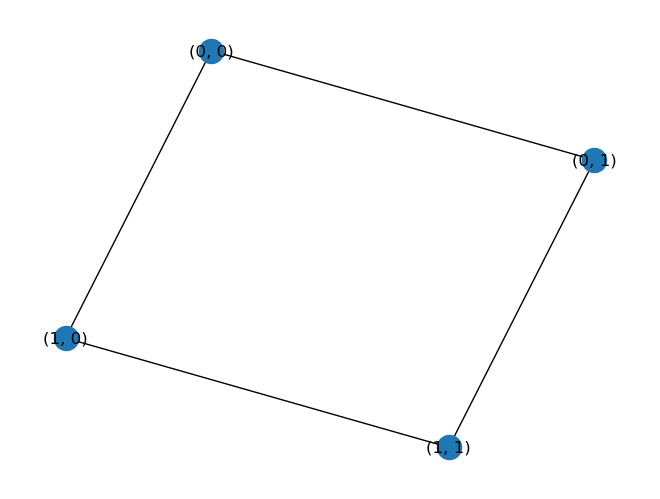

In [48]:
new_graph = nx.Graph()
new_graph.add_edge((0,0), (0,1))
new_graph.add_edge((0,1), (1,1))
new_graph.add_edge((1,1), (1,0))
new_graph.add_edge((1,0), (0,0))
nx.draw(new_graph, with_labels=True)

In [49]:
#new_graph.add_edge((0,0), [4,5,6])  # uncomment line to trigger TypeError

## Installing Python and associated packages

* Your machine might already have a version of Python installed
    * it might be part of the OS in /bin or /usr/bin and used for system administration — best to leave that one alone (don't update unless part of system updates, don't add extra packages to it)
    * it might have been installed by sys-admins in a centralized location for multiple users, but might not have every package you need (you can still install additional packages — see below)
* Multiple installations of Python can co-exist on a single machine
    * any given installation knows where to look for packages
    * from within python interpreter: import sys; print(sys.path)
* Several different organizations produce bundled Python distributions ("batteries included")
    * Anaconda, Enthought, ActiveState, Intel, etc.
    * Anaconda Python Distribution is probably the most popular, and installs a large number of packages by default
    * Alternatively, Anaconda also provides miniconda and the conda package manager (more below)

#### Environments, virtual environments, and package managers

* One *big* Python installation might be convenient, but can also suffer from incompatibilities among packages (e.g., different version requirements) and can be difficult to maintain, especially if supporting multiple users
* Generally better to create smaller, focused environments (walled-off installations) for different problems and use cases
* For *any* Python installation, you can use the Python ```venv``` module to create a new virtual environment, and use the ```pip``` package manager to install packages (downloaded from PyPI, the Python Package Index, at pypi.org)
* For a conda-based installation (either the full Anaconda Python Distribution, or a miniconda-based system), you can use the ```conda``` package manager to create and manage conda environments

### Conda package manager

* Conda is a package manager that can install Python packages along with programs and tools written in other languages (and perhaps compiled from source code as part of an installation)
* Miniconda is a minimal setup that mostly just installs conda and some supporting tools — it's up to you to build environments to suit your needs
* Different packages might be available from different channels (e.g., default, conda-forge, bioconda)
* Can specify version numbers or requirements
* Can install packages as part of environment creation, after the fact, or from an yaml file (environment.yml)
* To create and activate a conda environment with everything needed to run this notebook:

```
conda create -n intermediate_py -c conda-forge python numpy jupyter numba cython networkx biopython matplotlib
```
Some other useful commands:

* conda env list: list all your conda environments
* conda list: list all the packages installed in your currently activated environment
* conda env remove --name ENVNAME -all: remove environment ENVNAME and everything in it
* conda update PACKAGENAME: update package PACKAGENAME in the current environment

### Python Virtual Environments and pip

* Python virtual environments use an existing python installation and create a new environment using the venv module (part of the Python Standard Library)
* Can do this to customize a centralized Python installation with additional packages for your work
* Once created and activated, packages are installed into a Python virtual environment using the pip package manager
* pip can also be used within a conda environment for packages that conda does not know about
* To create and activate a python virtual environment with everything needed to run this notebook:

```
python -m venv intermediate_py       # might be installed as python3 on your system
source intermediate_py/bin/activate
pip install --upgrade pip      # get the latest version of pip
pip install numpy jupyter numba cython networkx biopython matplotlib
```